/tmp/ipykernel_457219/953469821.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


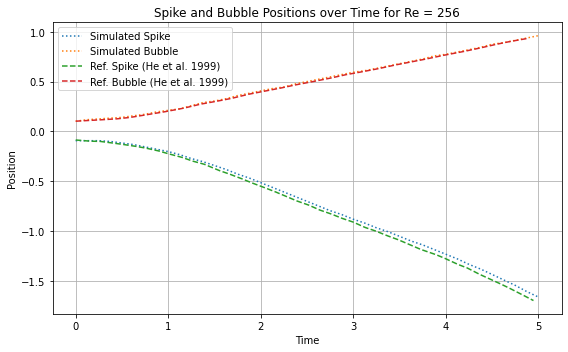

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Read the simulation data from spike_bubble.dat
#    Assumes each line has: <time> <spike_y> <bubble_y>
#    (Note: fixed “Deownloads” → “Downloads”)
df = pd.read_csv(
    "~/Desktop/coolbm-phase-field/out_256/spike_bubble.dat",
    delim_whitespace=True,
    names=["time", "spike_y", "bubble_y"]
)


# 2) Reference data from the article (numerical inputs).
#    Each pair is (time, height).
#    We split them into separate x‐ and y‐lists for plotting.

# Bubble reference points:
x_bubble_256 = np.array([
    0.0, 0.26523812675708003, 0.4459490059327025,
    0.5886599338798062, 0.7693708130554286, 0.965824529168581,
    1.1712655353341912, 1.3521134994709563, 1.5028082555549607,
    1.6779918690973443, 1.870862732666093, 2.0578506408224264,
    2.2151985870205158, 2.3780354150627234, 2.5701462796069015,
    2.7571904839872774, 2.9177754630677954, 3.0726284629731024,
    3.2686979756351606, 3.4666636474797334, 3.629500475521941,
    3.780195231605947, 3.9720067025949914, 4.190830125447216,
    4.381899509846614, 4.549636668299772, 4.700331424383776,
    4.8754766541370405
])

y_bubble_256 = np.array([
    0.10211126615300659, 0.11554468706686172, 0.12564096341685405,
    0.13997937268701133, 0.16729870869287278, 0.1974380530589963,
    0.23367798857697575, 0.27373768014428124, 0.29880482921798257,
    0.329913803965858, 0.3730704362070014, 0.40664927501061743,
    0.43483589152460156, 0.4670761017178542, 0.5010131650791729,
    0.5355158461631802, 0.5687223199660258, 0.5945971882876575,
    0.6292009949645093, 0.6689073590972522, 0.6982080711256229,
    0.7252805921252203, 0.7630261481526426, 0.801752108232725,
    0.8395353721083264, 0.8750150292587959, 0.9034244648756574,
    0.9317723599783908
])

# From X_Y_spike_256
x_spike_256 = np.array([
    0.04550326415278194, 0.203877555182423, 0.30823980476264934,
    0.44967811669374536, 0.5540403662739712, 0.6954786782050673,
    0.7998409277852931, 0.9374648300095094, 1.045641489296615,
    1.1925725512056178, 1.3115821340602611, 1.4342535502335099,
    1.6026978828893133, 1.707517861634365, 1.8429141485897635,
    1.9533184231456868, 2.0856936976132374, 2.2066187009729967,
    2.3240790466543846, 2.436680421201471, 2.5657600456822767,
    2.682480982712793, 2.8074410447101688, 2.9251428299510254,
    3.043629293760154, 3.1731012575250963, 3.2864088427836275,
    3.4210596850991672, 3.529188391807101, 3.669018112673239,
    3.7719679408305735, 3.938947540158936, 4.033422839778931,
    4.176705146345466, 4.275836205470543, 4.407662204940302,
    4.642019537330985, 4.7482127035705135, 4.8837005363588775,
    4.9915433403805505
])

y_spike_256 = np.array([
   -0.08680876362946366, -0.09865655790428263, -0.10088263876466286,
   -0.11780240932337716, -0.1310684508334028,  -0.15074821155452867,
   -0.167694239947769,   -0.19575889443730077, -0.22455995691981823,
   -0.2609630406969077,  -0.29935134643248973, -0.33037708503526875,
   -0.39564260763236847, -0.429158475015067,   -0.477086414119384,
   -0.5189600745918908,  -0.5652341591260188,  -0.608989690179135,
   -0.6549239197780095,  -0.6993664393112415,  -0.741399721484004,
   -0.7901187021662293,  -0.8302173330247715,  -0.8738636890815088,
   -0.9112104988817142,  -0.9651620407984574,  -1.000830238641635,
   -1.0512032683965273,  -1.0878739875833054,  -1.1435530449372524,
   -1.184853701109657,   -1.2384232558409107,  -1.2750368067053013,
   -1.3365124469121432,  -1.3718081862523857,  -1.4348879332248177,
   -1.534471905262885,   -1.582459556627939,   -1.6470421594134952,
   -1.699015985003201
])


x_spike_shifted_256  = x_spike_256  - 0.04550326415278194
x_bubble_shifted_256 = x_bubble_256




# 3) Plot simulation data (shifted by –2 in y) and overlay reference points
plt.figure(figsize=(8, 5))

# Simulation curves
plt.plot(
    df["time"],
    df["spike_y"] - 2,
    
    #marker="o",
    linestyle=":",
    label="Simulated Spike"
)
plt.plot(
    df["time"],
    df["bubble_y"] - 2,
    #marker="s",
    linestyle=":",
    label="Simulated Bubble"
)
# Reference (article) curves—use different markers and dashed lines
plt.plot(   x_spike_shifted_256,   y_spike_256,   #marker="x",
    linestyle="--",    label="Ref. Spike (He et al. 1999)")

plt.plot(   x_bubble_shifted_256,   y_bubble_256,   #marker="^",   
         linestyle="--",    label="Ref. Bubble (He et al. 1999)")


plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Spike and Bubble Positions over Time for Re = 256")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_457219/1846448355.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


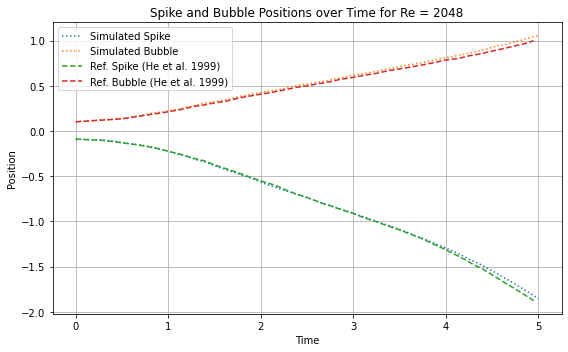

In [8]:

# 1) Read the simulation data from spike_bubble.dat
#    Assumes each line has: <time> <spike_y> <bubble_y>
#    (Note: fixed “Deownloads” → “Downloads”)
df = pd.read_csv(
    "~/Desktop/coolbm-phase-field/out_2048/spike_bubble.dat",
    delim_whitespace=True,
    names=["time", "spike_y", "bubble_y"]
)


# From X_Y_spike_2048
x_spike_2048 = np.array([
    0.045503, 0.20388, 0.30824, 0.44968, 0.55404, 0.69548, 0.79984,
    0.93746, 1.0456,  1.1926,  1.3116,  1.4343,  1.6027,  1.7075,
    1.8429,  1.9533,  2.0857,  2.2066,  2.3241,  2.4367,  2.5658,
    2.6825,  2.8074,  2.9251,  3.0436,  3.1731,  3.2864,  3.4211,
    3.5292,  3.6690,  3.7720,  3.9389,  4.0334,  4.1696,  4.2758,
    4.3354,  4.4322,  4.5706,  4.7244,  4.8782,  4.9936
])

y_spike_2048 = np.array([
   -0.086809, -0.098657, -0.10088, -0.11780, -0.13107, -0.15075,
   -0.16769, -0.19576, -0.22456, -0.26096, -0.29935, -0.33038,
   -0.39564, -0.42916, -0.47709, -0.51896, -0.56523, -0.60191,
   -0.65492, -0.69937, -0.74140, -0.79012, -0.83022, -0.87386,
   -0.91121, -0.96516, -1.0008,  -1.0512,  -1.0879,  -1.1436,
   -1.1849,  -1.2639,  -1.3090,  -1.3787,  -1.4355,  -1.4737,
   -1.5201,  -1.6071,  -1.7033,  -1.8007,  -1.8755
])


x_bubble_2048 = np.array([
    0.050081, 0.16726, 0.29176, 0.44968, 0.55404, 0.69548, 0.79984,
    0.93746, 1.0456,  1.1926,  1.3116,  1.4343,  1.5624,  1.6759,
    1.8308,  1.9382,  2.0736,  2.1703,  2.3131,  2.4216,  2.5548,
    2.6674,  2.7965,  2.9079,  3.0381,  3.1731,  3.2864,  3.4211,
    3.5292,  3.6690,  3.7720,  3.9389,  4.0470,  4.1806,  4.2983,
    4.4223,  4.5450,  4.6640,  4.8109,  4.9153,  4.9990
])

y_bubble_2048 = np.array([
    0.10154, 0.10893, 0.11811, 0.12692, 0.13527, 0.15699, 0.17408,
    0.19473, 0.21198, 0.23885, 0.26859, 0.28786, 0.31293, 0.33018,
    0.36857, 0.38787, 0.41106, 0.42674, 0.45676, 0.47975, 0.50042,
    0.52271, 0.54408, 0.57131, 0.59042, 0.61828, 0.63419, 0.66577,
    0.68330, 0.70748, 0.72616, 0.75933, 0.78573, 0.80132, 0.83094,
    0.85358, 0.88299, 0.90992, 0.94479, 0.97044, 0.99862
])

# shift both x‐arrays left by 0.05
x_spike_shifted_2048  = x_spike_2048 - 0.045503
x_bubble_shifted_2048 = x_bubble_2048 - 0.050081



# 3) Plot simulation data (shifted by –2 in y) and overlay reference points
plt.figure(figsize=(8, 5))

# Simulation curves
plt.plot(
    df["time"],
    df["spike_y"] - 2,
    
    #marker="o",
    linestyle=":",
    label="Simulated Spike"
)
plt.plot(
    df["time"],
    df["bubble_y"] - 2,
    #marker="s",
    linestyle=":",
    label="Simulated Bubble"
)
# Reference (article) curves—use different markers and dashed lines
plt.plot(   x_spike_shifted_2048,   y_spike_2048,   #marker="x",
    linestyle="--",    label="Ref. Spike (He et al. 1999)")

plt.plot(   x_bubble_shifted_2048,   y_bubble_2048,   #marker="^",   
         linestyle="--",    label="Ref. Bubble (He et al. 1999)")


plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Spike and Bubble Positions over Time for Re = 2048")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

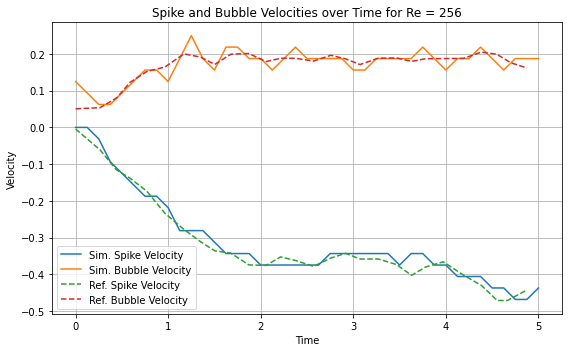

In [85]:
# --- Compute velocities --------------------------------------------------
df = pd.read_csv(
    "~/Desktop/coolbm-phase-field/out_256/spike_bubble.dat",
    sep=r"\s+",
    names=["time", "spike_y", "bubble_y"]
)

# Simulation velocities via finite‐difference (np.gradient)
df["spike_v"]  = np.gradient(df["spike_y"],  df["time"])
df["bubble_v"] = np.gradient(df["bubble_y"], df["time"])


# Reference velocities for Re = 256 (central differences on your shifted arrays)
v_spike_ref  = np.gradient(y_spike_256,   x_spike_shifted_256)
v_bubble_ref = np.gradient(y_bubble_256,  x_bubble_shifted_256)

# --- Plot velocities -----------------------------------------------------

plt.figure(figsize=(8, 5))

# Simulation velocity curves
plt.plot(df["time"], df["spike_v"],  linestyle="-",  label="Sim. Spike Velocity")
plt.plot(df["time"], df["bubble_v"], linestyle="-",  label="Sim. Bubble Velocity")

# Reference velocity curves
plt.plot(x_spike_shifted_256,  v_spike_ref,  linestyle="--", label="Ref. Spike Velocity")
plt.plot(x_bubble_shifted_256, v_bubble_ref, linestyle="--", label="Ref. Bubble Velocity")

plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Spike and Bubble Velocities over Time for Re = 256")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


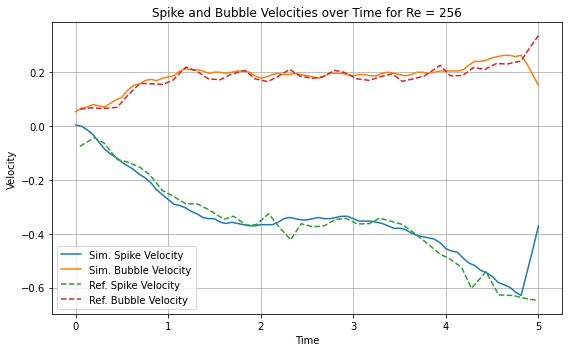

In [95]:
# --- Compute velocities --------------------------------------------------
df = pd.read_csv(
    "~/Desktop/coolbm-phase-field/out_2048/spike_bubble.dat",
    sep=r"\s+",
    names=["time", "spike_y", "bubble_y"]
)


# Simulation velocities via finite‐difference (np.gradient)
#df["spike_v"]  = np.gradient(df["spike_y"],  df["time"])
#df["bubble_v"] = np.gradient(df["bubble_y"], df["time"])

import numpy as np
import pandas as pd

# Basic moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# 1. Compute raw velocity from raw position
df["spike_v_raw"] = np.gradient(df["spike_y"], df["time"])
df["bubble_v_raw"] = np.gradient(df["bubble_y"], df["time"])

# 2. Apply moving average smoothing directly on velocity
df["spike_v"] = moving_average(df["spike_v_raw"], window_size=7)
df["bubble_v"] = moving_average(df["bubble_v_raw"], window_size=7)




# Reference velocities for Re = 256 (central differences on your shifted arrays)
v_spike_ref  = np.gradient(y_spike_2048,   x_spike_shifted_2048)
v_bubble_ref = np.gradient(y_bubble_2048,  x_bubble_shifted_2048)

# --- Plot velocities -----------------------------------------------------

plt.figure(figsize=(8, 5))

# Simulation velocity curves
plt.plot(df["time"], df["spike_v"],  linestyle="-",  label="Sim. Spike Velocity")
plt.plot(df["time"], df["bubble_v"], linestyle="-",  label="Sim. Bubble Velocity")

# Reference velocity curves
plt.plot(x_spike_shifted_2048,  v_spike_ref,  linestyle="--", label="Ref. Spike Velocity")
plt.plot(x_bubble_shifted_2048, v_bubble_ref, linestyle="--", label="Ref. Bubble Velocity")

plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Spike and Bubble Velocities over Time for Re = 256")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
